In [1]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt -O /tmp/irish-lyrics-eof.txt

--2024-11-05 17:32:53--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 209.85.145.207, 142.250.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2024-11-05 17:32:53 (44.5 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [2]:
def tokenize(text):
    tokens = text.lower().split()
    return tokens

def create_word_dictionary(word_list):
    # Create an empty dictionary
    word_dict = {}
    word_dict["UNK"] = 0
    # Counter for unique values
    counter = 1

    # Iterate through the list and assign numbers to unique words
    for word in word_list:
        if word not in word_dict:
            word_dict[word] = counter
            counter += 1

    return word_dict

def text_to_sequence(sentence, word_dict):
    # Convert sentence to lowercase and split into words
    words = sentence.lower().strip().split()

    # Convert each word to its corresponding number
    number_sequence = [word_dict[word] for word in words]

    return number_sequence

def pad_sequences(sequences, max_length=None):
    # If max_length is not specified, find the length of the longest sequence
    if max_length is None:
        max_length = max(len(seq) for seq in sequences)

    # Pad each sequence with zeros at the beginning
    padded_sequences = []
    for seq in sequences:
        # Calculate number of zeros needed
        num_zeros = max_length - len(seq)
        # Create padded sequence
        padded_seq = [0] * num_zeros + list(seq)
        padded_sequences.append(padded_seq)

    return padded_sequences

def split_sequences(sequences):
    # Create xs by removing the last element from each sequence
    xs = [seq[:-1] for seq in sequences]

    # Create labels by taking just the last element from each sequence
    labels = [seq[-1:] for seq in sequences]  # Using [-1:] to keep it as a single-element list
    # Alternative if you want labels as single numbers instead of lists:
    # labels = [seq[-1] for seq in sequences]

    return xs, labels

def one_hot_encode_with_checks(value, corpus_size):
    # Check if value is within valid range
    if not 0 <= value < corpus_size:
        raise ValueError(f"Value {value} is out of range for corpus size {corpus_size}")
    # Create and return one-hot encoded list
    encoded = [0] * corpus_size
    encoded[value] = 1
    return encoded


In [3]:
data = open('/tmp/irish-lyrics-eof.txt').read().lower()
tokens = tokenize(data)
word_index = create_word_dictionary(tokens)
print(len(word_index))


3259


In [5]:
print(len(data))

68953


In [6]:
corpus = data.lower().split("\n")

input_sequences = []
for line in corpus:
    token_list = text_to_sequence(line, word_index)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, max_sequence_len)
print(input_sequences)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 9, 10], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 9, 10, 11], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 9, 10, 11, 12], [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 9, 10, 11, 12, 13], [0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 9, 10, 11, 12, 13, 14], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 6, 17], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 6, 17, 13], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 6, 17, 13, 18], [0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 6, 17, 13, 18, 7], [0, 0, 0, 0, 

In [7]:
xs, labels = split_sequences(input_sequences)
print(xs)
print(labels)
print(len(labels))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 9, 10], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 9, 10, 11], [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 9, 10, 11, 12], [0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 9, 10, 11, 12, 13], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 6, 17], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 6, 17, 13], [0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 6, 17, 13, 18], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
vocab_size = len(word_index)
ys = []
for y in labels:
  ys.append(one_hot_encode_with_checks(y[0], vocab_size))
print(ys[0])

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
# First, unoptimized Version
import torch
import torch.nn as nn

# First, check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

class LSTMPredictor(nn.Module):
    def __init__(self, total_words, embedding_dim=8, hidden_dim=None):
        super(LSTMPredictor, self).__init__()

        # If hidden_dim not specified, use max_sequence_len-1 as in TF version
        if hidden_dim is None:
            hidden_dim = max_sequence_len-1

        # Embedding layer
        self.embedding = nn.Embedding(total_words, embedding_dim)

        # Bidirectional LSTM
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            bidirectional=True,
            batch_first=True
        )

        # Final dense layer (accounting for bidirectional LSTM)
        self.fc = nn.Linear(hidden_dim * 2, total_words)

        # Softmax activation
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Embedding layer
        x = self.embedding(x)

        # LSTM layer
        lstm_out, _ = self.lstm(x)

        # Take the output from the last time step
        lstm_out = lstm_out[:, -1, :]

        # Dense layer
        out = self.fc(lstm_out)

        # Softmax activation
        out = self.softmax(out)

        return out

# Training setup
total_words = len(word_index)
model = LSTMPredictor(total_words)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Convert data to PyTorch tensors
# Assuming xs and ys are numpy arrays
xs_tensor = torch.LongTensor(xs).to(device)
ys_tensor = torch.FloatTensor(ys).to(device)

import matplotlib.pyplot as plt

# Lists to store metrics
train_losses = []
train_accuracies = []

# Training loop with accuracy tracking
num_epochs = 50000
model.train()

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(xs_tensor)
    loss = criterion(outputs, ys_tensor)

    # Calculate accuracy
    _, predicted = torch.max(outputs.data, 1)
    _, targets = torch.max(ys_tensor, 1)

    correct = (predicted == targets).sum().item()
    total = targets.size(0)
    accuracy = 100 * correct / total

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(accuracy)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], '
            f'Loss: {loss.item():.4f}, '
            f'Accuracy: {accuracy:.2f}%')

# Plot training metrics
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

# Print final metrics
print(f'\nFinal Results:')
print(f'Loss: {train_losses[-1]:.4f}')
print(f'Accuracy: {train_accuracies[-1]:.2f}%')

Using device: cuda
Epoch [100/50000], Loss: 8.0868, Accuracy: 0.67%
Epoch [200/50000], Loss: 8.0265, Accuracy: 6.60%
Epoch [300/50000], Loss: 8.0232, Accuracy: 6.60%
Epoch [400/50000], Loss: 8.0043, Accuracy: 8.87%
Epoch [500/50000], Loss: 7.9982, Accuracy: 9.26%
Epoch [600/50000], Loss: 7.9967, Accuracy: 9.35%
Epoch [700/50000], Loss: 7.9962, Accuracy: 9.38%
Epoch [800/50000], Loss: 7.9960, Accuracy: 9.39%
Epoch [900/50000], Loss: 7.9959, Accuracy: 9.39%
Epoch [1000/50000], Loss: 7.9958, Accuracy: 9.39%
Epoch [1100/50000], Loss: 7.9957, Accuracy: 9.40%
Epoch [1200/50000], Loss: 7.9957, Accuracy: 9.40%
Epoch [1300/50000], Loss: 7.9957, Accuracy: 9.40%
Epoch [1400/50000], Loss: 7.9956, Accuracy: 9.41%
Epoch [1500/50000], Loss: 7.9955, Accuracy: 9.42%
Epoch [1600/50000], Loss: 7.9952, Accuracy: 9.42%
Epoch [1700/50000], Loss: 7.9863, Accuracy: 10.45%
Epoch [1800/50000], Loss: 7.9824, Accuracy: 10.89%
Epoch [1900/50000], Loss: 7.9804, Accuracy: 11.00%
Epoch [2000/50000], Loss: 7.9709, Acc

KeyboardInterrupt: 

In [20]:
def generate_sequence(model, initial_text, word_dict, sequence_length, num_words=10, device=None):
    # If device is not specified, check for GPU
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Ensure model is on the correct device
    model = model.to(device)

    # Set model to evaluation mode
    model.eval()

    # Start with the initial text
    current_text = initial_text
    generated_sequence = initial_text

    # Create reverse dictionary for converting numbers back to words
    reverse_dict = {v: k for k, v in word_dict.items()}

    print(f"Initial text: {initial_text}")
    print(f"Using device: {device}")

    for i in range(num_words):
        # Convert current text to lowercase and split into words
        words = current_text.lower().strip().split()

        # Take the last 'sequence_length' words if we exceed it
        if len(words) > sequence_length:
            words = words[-sequence_length:]

        # Convert words to numbers using the word dictionary, use 0 for unknown words
        number_sequence = [word_dict.get(word, 0) for word in words]

        # Pad the sequence
        padded_sequence = [0] * (sequence_length - len(number_sequence)) + number_sequence

        # Convert to PyTorch tensor, add batch dimension, and move to GPU
        input_tensor = torch.LongTensor([padded_sequence]).to(device)

        # Get prediction
        with torch.no_grad():
            output = model(input_tensor)
            # Move output back to CPU for processing
            output = output.cpu()

        # Get the predicted word index (highest probability)
        predicted_idx = torch.argmax(output[0]).item()

        # Convert predicted index to word
        predicted_word = reverse_dict[predicted_idx]

        # Add the predicted word to the sequence
        generated_sequence += " " + predicted_word

        # Update current text for next prediction
        current_text = generated_sequence

        # Print progress
        print(f"Generated word {i+1}: {predicted_word}")

        # Optionally print top 5 predictions for each step
        _, top_indices = torch.topk(output[0], 5)
        print(f"\nTop 5 predictions for step {i+1}:")
        for idx in top_indices:
            word = reverse_dict[idx.item()]
            probability = output[0][idx].item()
            print(f"{word}: {probability:.4f}")
        print("\n" + "-"*50 + "\n")

    return generated_sequence

# Example usage:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
initial_text = "you know nothing jon snow"
generated_text = generate_sequence(
    model=model,
    initial_text=initial_text,
    word_dict=word_index,
    sequence_length=max_sequence_len,
    num_words=100,
    device=device
)

print("\nFinal generated sequence:")
print(generated_text)

Initial text: you know nothing jon snow
Using device: cuda
Generated word 1: tis

Top 5 predictions for step 1:
tis: 17.1961
come: 17.0439
oh: 16.9804
rings: 11.9020
and: 10.9738

--------------------------------------------------

Generated word 2: ill

Top 5 predictions for step 2:
ill: 17.7557
all: 16.1268
but: 13.8248
trod.: 13.3383
out: 12.4091

--------------------------------------------------

Generated word 3: be

Top 5 predictions for step 3:
be: 24.2965
go: 19.1209
think: 15.6722
make: 15.4980
spend: 14.9060

--------------------------------------------------

Generated word 4: here

Top 5 predictions for step 4:
here: 17.8192
surely: 12.9284
your: 12.6757
of: 12.4611
on: 10.6957

--------------------------------------------------

Generated word 5: in

Top 5 predictions for step 5:
in: 28.9162
but: 22.0646
and: 20.8020
to: 17.7574
until: 16.1360

--------------------------------------------------

Generated word 6: sunshine

Top 5 predictions for step 6:
sunshine: 24.6875
t

In [18]:
# Aggressive Optimization
import torch
import torch.nn as nn

# First, check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

class LSTMPredictor(nn.Module):
    def __init__(self, total_words, embedding_dim=16, hidden_dim=64):
        super(LSTMPredictor, self).__init__()

        # Embedding layer with larger dimension
        self.embedding = nn.Embedding(total_words, embedding_dim)

        # Single more powerful LSTM layer instead of two
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=2,  # Stacked in a more efficient way
            bidirectional=True,
            batch_first=True,
            dropout=0.0  # Remove dropout initially to speed up learning
        )

        # Final dense layer
        self.fc = nn.Linear(hidden_dim * 2, total_words)

        # Initialize weights more aggressively
        self.init_weights()

    def init_weights(self):
        for name, param in self.named_parameters():
            if 'weight' in name:
                if 'lstm' in name:
                    # Special initialization for LSTM
                    for k in range(4):
                        nn.init.orthogonal_(param[k*param.size(0)//4:(k+1)*param.size(0)//4])
                else:
                    nn.init.orthogonal_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0.0)

    def forward(self, x):
        # Embedding layer
        x = self.embedding(x)

        # LSTM layer
        lstm_out, _ = self.lstm(x)

        # Take the output from the last time step
        lstm_out = lstm_out[:, -1, :]

        # Dense layer
        out = self.fc(lstm_out)

        return out

# Training setup
total_words = len(word_index)
model = LSTMPredictor(total_words)
model = model.to(device)
criterion = nn.CrossEntropyLoss()

# Much more aggressive learning rate
initial_lr = 0.01

# Using AdamW with weight decay and higher learning rate
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=initial_lr,
    weight_decay=0.01,
    betas=(0.9, 0.999)
)

# More aggressive learning rate scheduler
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=initial_lr,
    epochs=20000,
    steps_per_epoch=1,
    pct_start=0.1,  # Quick warmup
    div_factor=10.0,  # Initial lr = max_lr/10
    final_div_factor=1000.0  # Min lr = initial_lr/1000
)

# Convert data to PyTorch tensors
xs_tensor = torch.LongTensor(xs).to(device)
ys_tensor = torch.LongTensor(ys).to(device)

# Lists to store metrics
train_losses = []
train_accuracies = []

# Training loop with accuracy tracking
num_epochs = 20000
best_loss = float('inf')
patience_counter = 0
patience = 1000
min_delta = 0.0001

model.train()
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(xs_tensor)
    loss = criterion(outputs, torch.max(ys_tensor, 1)[1])

    # Calculate accuracy
    _, predicted = torch.max(outputs.data, 1)
    _, targets = torch.max(ys_tensor, 1)

    correct = (predicted == targets).sum().item()
    total = targets.size(0)
    accuracy = 100 * correct / total

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(accuracy)

    # Early stopping check
    if loss.item() < best_loss - min_delta:
        best_loss = loss.item()
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f'Early stopping triggered at epoch {epoch+1}')
        break

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()

    # More aggressive gradient clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)

    optimizer.step()
    scheduler.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Loss: {loss.item():.4f}, '
              f'Accuracy: {accuracy:.2f}%, '
              f'LR: {scheduler.get_last_lr()[0]:.6f}')



Using device: cuda
Epoch [100/20000], Loss: 6.4355, Accuracy: 6.35%, LR: 0.001055
Epoch [200/20000], Loss: 5.9393, Accuracy: 6.74%, LR: 0.001220
Epoch [300/20000], Loss: 5.4948, Accuracy: 9.01%, LR: 0.001491
Epoch [400/20000], Loss: 4.9454, Accuracy: 10.93%, LR: 0.001860
Epoch [500/20000], Loss: 4.4481, Accuracy: 13.84%, LR: 0.002319
Epoch [600/20000], Loss: 3.7855, Accuracy: 24.31%, LR: 0.002857
Epoch [700/20000], Loss: 3.1199, Accuracy: 35.17%, LR: 0.003459
Epoch [800/20000], Loss: 2.5816, Accuracy: 43.96%, LR: 0.004112
Epoch [900/20000], Loss: 2.1867, Accuracy: 51.28%, LR: 0.004799
Epoch [1000/20000], Loss: 1.8498, Accuracy: 58.22%, LR: 0.005504
Epoch [1100/20000], Loss: 1.6444, Accuracy: 62.14%, LR: 0.006208
Epoch [1200/20000], Loss: 1.3780, Accuracy: 68.37%, LR: 0.006895
Epoch [1300/20000], Loss: 1.2048, Accuracy: 72.45%, LR: 0.007547
Epoch [1400/20000], Loss: 1.3912, Accuracy: 66.72%, LR: 0.008149
Epoch [1500/20000], Loss: 0.9824, Accuracy: 77.23%, LR: 0.008686
Epoch [1600/20000]

KeyboardInterrupt: 

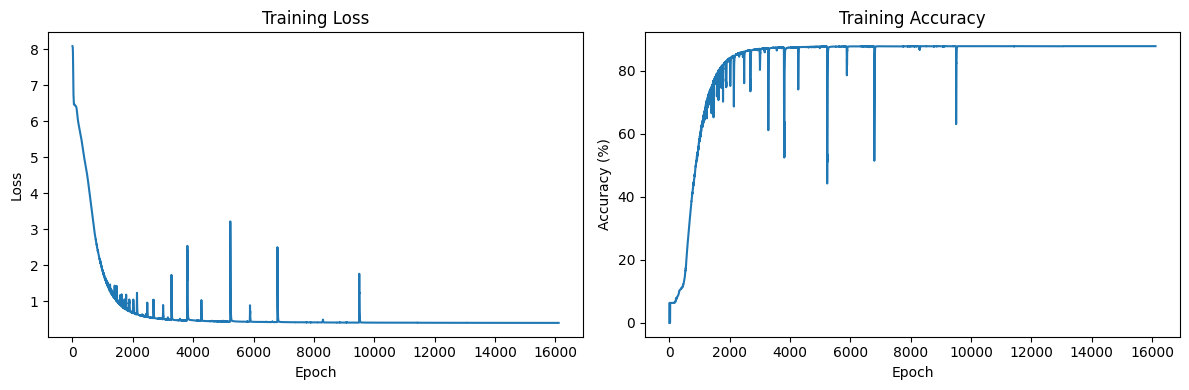


Final Results:
Loss: 0.4062
Accuracy: 87.78%


In [19]:
import matplotlib.pyplot as plt
# Plot training metrics
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

# Print final metrics
print(f'\nFinal Results:')
print(f'Loss: {train_losses[-1]:.4f}')
print(f'Accuracy: {train_accuracies[-1]:.2f}%')

In [14]:
# Windowing the data
window_size=8
sentences=[]
alltext=[]
data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower()
words = corpus.split(" ")
range_size = len(words)-max_sequence_len
for i in range(0, range_size):
    thissentence=""
    for word in range(0, window_size-1):
        word = words[i+word]
        thissentence = thissentence + word
        thissentence = thissentence + " "
    sentences.append(thissentence)

In [15]:
input_sequences = []
for line in sentences:
    token_list = text_to_sequence(line, word_index)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, max_sequence_len)
print(len(input_sequences))

83583


In [16]:
xs, labels = split_sequences(input_sequences)
print(len(xs))
print(len(labels))

83583
83583


In [17]:
vocab_size = len(word_index)
ys = []
for y in labels:
  ys.append(one_hot_encode_with_checks(y[0], vocab_size))
print(ys[0])

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 